# Classification (ch. 3)
## Using the MNIST dataset

In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [2]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


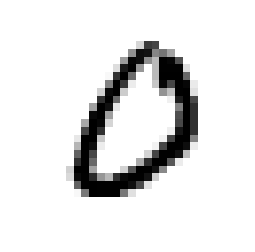

Target = 0.0  at 4950


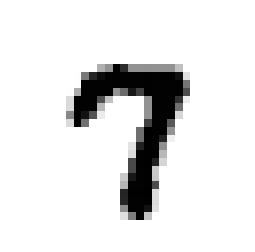

Target = 7.0  at 46185


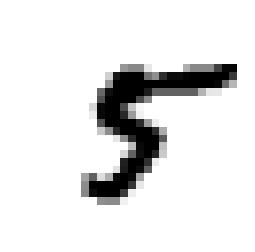

Target = 5.0  at 65996


In [69]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from random import randint

for i in range(3):
    index = randint(0,len(X))

    some_digit = X[index]
    some_digit_image = some_digit.reshape(28, 28)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
               interpolation = "nearest")

    plt.axis("off")
    plt.show()
    print("Target =", y[index], " at {}".format(index))

## We need to create our test set and leave it alone until we've fully developed the model 

In [50]:
import numpy as np

shuffle_index = np.random.permutation(60000)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a binary classifier 

In [70]:
from sklearn.linear_model import SGDClassifier

index = 65996

some_digit = X[index]
some_digit_image = some_digit.reshape(28, 28)

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

## Measuring accuracy using cross-validation 

In [72]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.96335,  0.95235,  0.9629 ])

The previous output shows around 95% accuracy, but a model that always predicts that an image is "not 5" would reach about 90% accuracy, since about 90% of the images don't contain 5. The upshot of this is that accuracy isn't a very informative performance measure

## Confusion matrix 

In [73]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [74]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54218,   361],
       [ 2067,  3354]])

### Interpreting the matrix

<table>
    <tr><th></th><th></th><th colspan="2">Predicted</th></tr>
    <tr><td></td><td></td><td>NEG</td><td>POS</td></tr>
    <tr><th rowspan="2">Actual</th><td>NEG</td><td>54218</td><td>361</td></tr>
    <tr><td>POS</td><td>2067</td><td>3354</td><td></td></tr>
</table>


$\textrm{precision}=\frac{\textrm{true positives}}{\textrm{true positives}+\textrm{false positives}}$

$\textrm{recall}=\frac{\textrm{true positives}}{\textrm{true positives}+\textrm{false negatives}}$


In [86]:
con_mat = confusion_matrix(y_train_5, y_train_pred)

true_pos, false_pos, true_neg, false_neg = con_mat[1][1], con_mat[0][1], con_mat[0][0], con_mat[1][0]

precision = true_pos/(true_pos+false_pos)
recall = true_pos/(true_pos+false_neg)


print("Precision:", precision)
print("Recall:", recall)

Precision: 0.902826379542
Recall: 0.618705035971


In [83]:
from sklearn.metrics import precision_score, recall_score

print("Precision score:",precision_score(y_train_5, y_train_pred))
print("Recall score:", recall_score(y_train_5, y_train_pred))

Precision score: 0.902826379542
Recall score: 0.618705035971


<h3>F<sub>1</sub> Score</h3>
It's convenient to combine precision and recall into a single metric called the F<sub>1</sub> score


In [87]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.73423817863397556